In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('medical.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [8]:
px.histogram(df,
             x='age',
             marginal='box',
             nbins=47,
             title='age distribution')


In [9]:

px.histogram(x=df['bmi'],
             y=df['charges'])

In [10]:
px.histogram(df,
             x='charges',
             color='smoker',
             color_discrete_sequence=['green','red'])

In [11]:

px.histogram(df,x=df['charges'],
             color='sex',
             color_discrete_sequence=['black','blue']).show()

px.histogram(df,x=df['charges'],
             color='region',
             color_discrete_sequence=['black','blue','green','red']).show()

In [12]:
px.histogram(df,
             x='smoker').show()

In [13]:
px.histogram(df,
             y='charges',
             x='smoker').show()

In [14]:
px.scatter(df,
           x='age',
           y='charges',
           color='smoker',
           opacity=0.6,
           hover_data=['sex']).show()

In [15]:
px.scatter(df,
           x='bmi',
           y='charges',
           color='smoker',
           opacity=0.6,
           hover_data=['sex']).show()

In [16]:
px.violin(df,
          x='children',
          y='charges').show()

<Axes: >

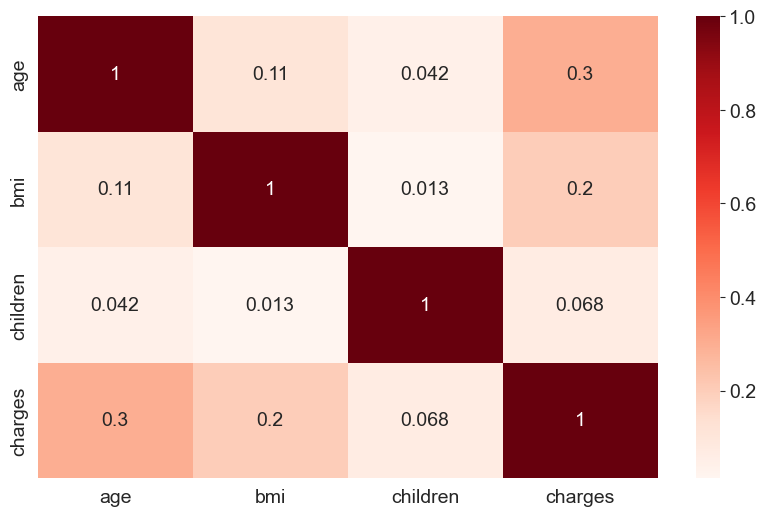

In [17]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='Reds',annot=True)

In [18]:
import numpy as np

In [19]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [20]:
df['smoker']=df['smoker'].map({"yes":'1','no':'0'})
df['sex']=df['sex'].map({"female":'0','male':'1'})



In [21]:
from sklearn.linear_model import LinearRegression


x_train = df[['age','smoker','sex','bmi']]  # Make x_train a DataFrame (2D)
y_train = df['charges']



In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler= StandardScaler()
scaled_x_train = scaler.fit_transform(df[['age','bmi']])
categorical_x_train = x_train[['smoker','sex']]
final_xtrain=np.concatenate((scaled_x_train,categorical_x_train),axis=1)


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_xtrain, y_train, test_size=0.2, random_state=7)

In [25]:


modelLR = LinearRegression().fit(x_train, y_train)
predictions=modelLR.predict(x_test)  # Pass a 2D array for prediction



def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
loss = rmse(y_test,predictions)

print(loss)



6180.353670724596


In [26]:
from sklearn.metrics import r2_score

In [27]:
r2 = r2_score(y_test, predictions)
print(r2)

0.7612459740848726


In [29]:
from xgboost import XGBRegressor

In [70]:


modelXG = XGBRegressor(n_estimators=1000,learning_rate=0.01,max_depth=2,subsample=0.8, colsample_bytree=0.8,random_state=42)
modelXG.fit(x_train, y_train)
predictions = modelXG.predict(x_test)

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))


loss = rmse(y_test,predictions)
print(loss)

4750.415321616526


In [71]:
r2 = r2_score(y_test, predictions)
print(r2)

0.858945414567544
